# 선형 모델(Linear Models)
- 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행
- 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  - $x_1$~$x_p$: 입력 데이터
  - $w$: 모델이 학습할 파라미터
    - $w_0$: 편향
    - $w_1$~$w_p$: 가중치


## 선형 회귀(Linear Regression)

-  **선형 회귀(Linear Regression)** 또는 **최소제곱법(Ordinary Least Squares)** 은 가장 간단한 회귀 분석을 위한 선형 모델
- 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)** 를 최소화 하는 학습 파라미터 $w$를 찾음
- 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  - $y$: 정답
  - $\hat{y}$: 예측 값을 의미

- 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  - MAE(Mean Absoulte Error)
  - MAPE(Mean Absolute Percentage Error)
  - MSE(Mean Squared Error)
  - MPE(Mean Percentage Error)

[참고](https://mizykk.tistory.com/102)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 보스턴 주택 가격 데이터

- 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 13개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [3]:
!pwd

/content


In [4]:
# colab
# from sklearn.datasets import load_boston
# boston=  load_boston()

In [5]:
# from sklearn.datasets import load_boston
import pandas

!wget https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv
boston_df = pandas.read_csv("boston.csv")

--2022-12-20 05:00:47--  https://raw.githubusercontent.com/myoh0623/dataset/main/boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41084 (40K) [text/plain]
Saving to: ‘boston.csv.3’

boston.csv.3        100%[===================>]  40.12K  --.-KB/s    in 0.004s  

2022-12-20 05:00:47 (10.7 MB/s) - ‘boston.csv.3’ saved [41084/41084]



In [6]:
del boston_df["Unnamed: 0"]

In [7]:
boston_df
# MEDV 이 학습시켜야 하는 Target Data 입니다. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [32]:
# 통계량 확인
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [35]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [46]:
data = boston_df.iloc[:,:-1]
target = boston_df.iloc[:,-1:]

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

### 보스턴 주택 가격에 대한 선형 회귀

In [48]:
model = LinearRegression(normalize = True)
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

- 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [49]:
# 방법1
print(model.score(x_test, y_test))

# 방법2
from sklearn.metrics import r2_score
print(r2_score(y_test, model.predict(x_test)))

0.7157167625939056
0.7157167625939056


In [60]:
from sklearn.model_selection import cross_val_score

In [ ]:
model = LinearRegression(normalize = True)
scores = cross_val_score(model, x_train, y_train, cv = 4, scoring="r2")

In [69]:
scores # R2 Score의 값
print(f"R2 score mean:{scores.mean()}, std:{scores.std()}")

R2 score mean:0.6998339500731618, std:0.01760280462280755


In [ ]:
model = LinearRegression(normalize = True)
scores = cross_val_score(model, x_train, y_train, cv = 4, scoring="neg_root_mean_squared_error")

In [75]:
scores # R2 Score의 값
print(f"neg_root_mean_squared_error score mean:{scores.mean()}, std:{scores.std()}")

neg_root_mean_squared_error score mean:-5.10020201244571, std:0.3267346831530459


생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
- intercept_: 추정된 상수항
- coef_: 추정된 가중치 벡터

In [59]:
print('w_0 = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_[0]):
  print('w_' + str(i+1) + " = " + str(c))

w_0 = [30.48674347] 
w_1 = -0.11692204990362269
w_2 = 0.04541300818856764
w_3 = 0.014965222459989389
w_4 = 3.4769480614636934
w_5 = -17.16078184491235
w_6 = 4.283037204894867
w_7 = -0.005483488975807317
w_8 = -1.4213805014545606
w_9 = 0.32375786187937144
w_10 = -0.013355880432833606
w_11 = -0.8938127432293084
w_12 = 0.012754683314408908
w_13 = -0.4641480860104356


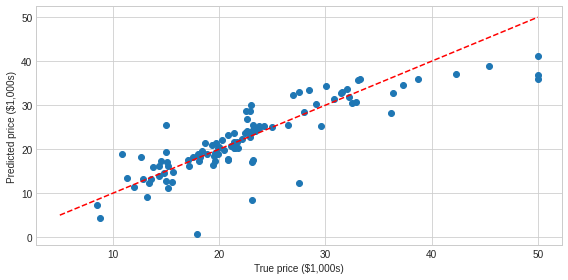

In [56]:
def plot_boston_price(expected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([5, 50], [5, 50], '--r') #기준점
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('Predicted price ($1,000s)')
  plt.tight_layout()

predicted = model.predict(x_test) 
expected = y_test                 

plot_boston_price(expected, predicted)

# 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 평균 방 수 |
| AveBedrms | 평균 침실 수 |
| Population | 블록 내 거주 중인 인구수 |
| AveOccup | 평균 주택 점유율 |
| Latitude | 주택 블록 위도 |
| Longitude | 주택 블록 경도 |

In [10]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [11]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [12]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [13]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns = california.feature_names)
california_df["target"] = california.target

In [14]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


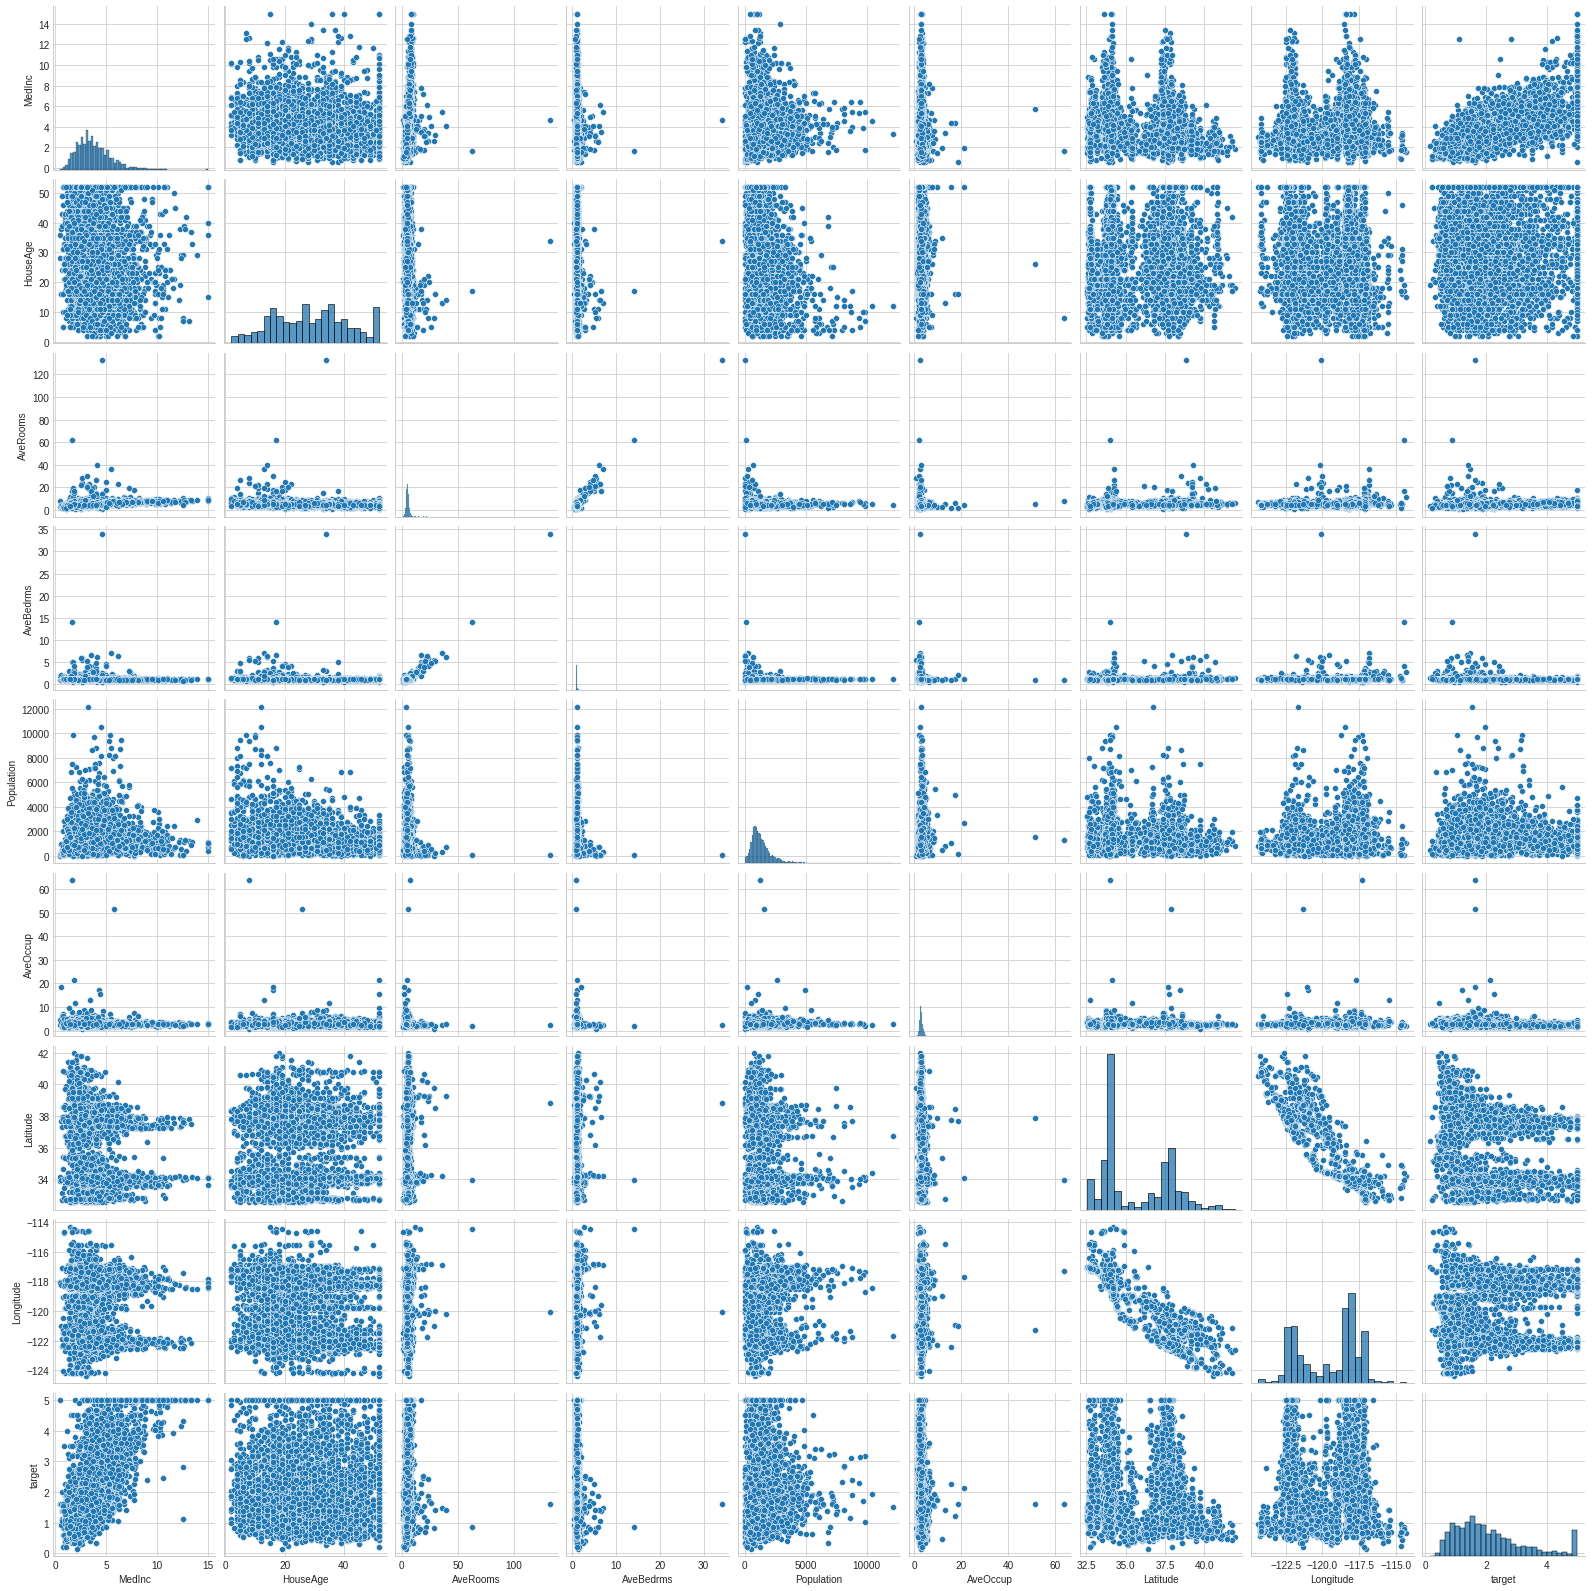

In [15]:
import seaborn as sns
sns.pairplot(california_df.sample(5000)) #데이터가 많아서plot으로 그리기 어렵다. 


### 캘리포니아 주택 가격에 대한 선형 회귀

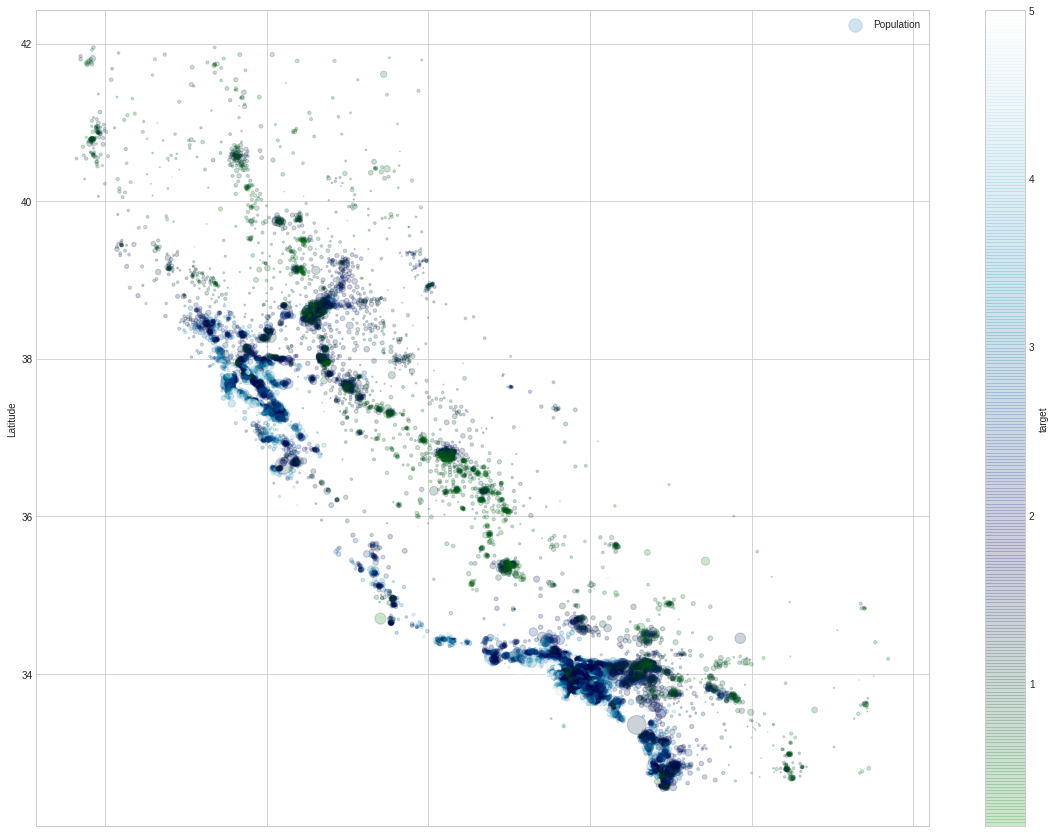

In [16]:
california_df.plot(kind="scatter", x = "Longitude", y = "Latitude", figsize = (20, 15), alpha = 0.2,
c = "target", cmap = plt.get_cmap("ocean"), s = california_df["Population"]/100, label = "Population")

In [17]:
# !pip install folium

In [20]:
import folium

In [21]:
latitude = 37.88
longitude = -122.23

m = folium.Map(location=[latitude, longitude],
               zoom_start=17, 
               width=750, 
               height=500
              )


from folium.plugins import MarkerCluster


m = folium.Map(
    location=[latitude,longitude],
    zoom_start=15
)

coords = california_df[["Latitude","Longitude"]]
marker_cluster = MarkerCluster().add_to(m)
for lat, long in zip(coords['Latitude'], coords['Longitude']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
m

Output hidden; open in https://colab.research.google.com to view.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)


In [26]:
model.fit(x_train, y_train)

LinearRegression()

In [27]:
y_test_predict = model.predict(x_test)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
print("R2 Score", r2_score(y_test, y_test_predict))
print("MSE", mean_squared_error(y_test, y_test_predict))


R2 Score 0.5950792101835026
MSE 0.5177668333489737


In [30]:
y_train_predict = model.predict(x_train)
print("R2 Score", r2_score(y_train, y_train_predict))
print("MSE", mean_squared_error(y_train, y_train_predict))

R2 Score 0.6085899089552025
MSE 0.5261706998650261


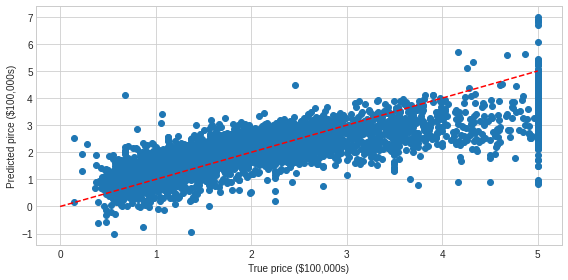

In [31]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize = (8, 4))
  plt.scatter(expected, predicted)
  plt.plot([0, 5], [0, 5], '--r')
  plt.xlabel('True price ($100,000s)')
  plt.ylabel('Predicted pirce ($100,000s)')
  plt.tight_layout()

predicted = model.predict(x_test)
expected = y_test

plot_california_prices(expected, predicted)